In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.6.0


In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Q1. A

In [3]:
import h5py

# Open the file as readonly
h5f = h5py.File('/content/drive/MyDrive/Dataset/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')



### Q1. B

In [4]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### Q1. C

In [5]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

### Q2. A

In [ ]:
X_train.shape

(42000, 32, 32)

In [ ]:
X_test.shape

(18000, 32, 32)

In [ ]:
y_train.shape

(42000,)

In [ ]:
y_test.shape

(18000,)

### Q2. B

In [ ]:
def img_lab(n):
    plt.figure(figsize=(n, 1))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_train[i], cmap="gray")
        plt.axis('off')
    plt.show()
    print('label for each of the above image: %s' % (y_train[0:n]))
    

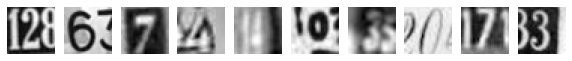

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
img_lab(10)

### Q2. C & Q2. D

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


### Q2. E & Q2.F

In [ ]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


### Q3. A

In [ ]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# build the model
model = nn_model()

2021-10-05 00:27:38.306891: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Q3. B

In [ ]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [ ]:
# Fit the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100


2021-10-05 00:27:38.392364: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


140/140 - 1s - loss: 2.2443 - accuracy: 0.1474 - val_loss: 2.1439 - val_accuracy: 0.1848
Epoch 2/100
140/140 - 1s - loss: 2.1076 - accuracy: 0.2200 - val_loss: 2.0322 - val_accuracy: 0.2821
Epoch 3/100
140/140 - 1s - loss: 1.8952 - accuracy: 0.3381 - val_loss: 1.7096 - val_accuracy: 0.4166
Epoch 4/100
140/140 - 1s - loss: 1.5364 - accuracy: 0.4838 - val_loss: 1.4353 - val_accuracy: 0.5086
Epoch 5/100
140/140 - 1s - loss: 1.3745 - accuracy: 0.5450 - val_loss: 1.3464 - val_accuracy: 0.5566
Epoch 6/100
140/140 - 1s - loss: 1.3046 - accuracy: 0.5720 - val_loss: 1.2468 - val_accuracy: 0.6046
Epoch 7/100
140/140 - 1s - loss: 1.2467 - accuracy: 0.5962 - val_loss: 1.2408 - val_accuracy: 0.6046
Epoch 8/100
140/140 - 1s - loss: 1.1883 - accuracy: 0.6204 - val_loss: 1.1842 - val_accuracy: 0.6250
Epoch 9/100
140/140 - 1s - loss: 1.1336 - accuracy: 0.6421 - val_loss: 1.1093 - val_accuracy: 0.6553
Epoch 10/100
140/140 - 1s - loss: 1.1015 - accuracy: 0.6516 - val_loss: 1.1126 - val_accuracy: 0.6467
E

### Q3. C

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6630930304527283
Accuracy: 0.8181111216545105


### Q3. D

Text(0.5, 1.0, 'Training and validation loss')

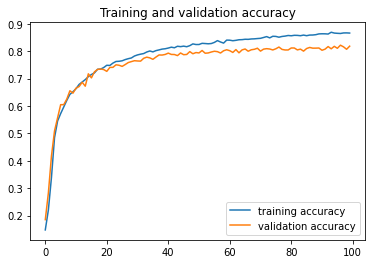

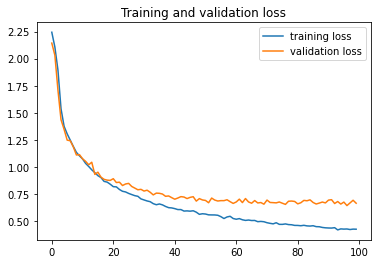

In [ ]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 80.74 %. 

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.


©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited 